In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
state = 'HR'

In [3]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [4]:
cases = c_data[state].resample('D').mean()#D,W,MS

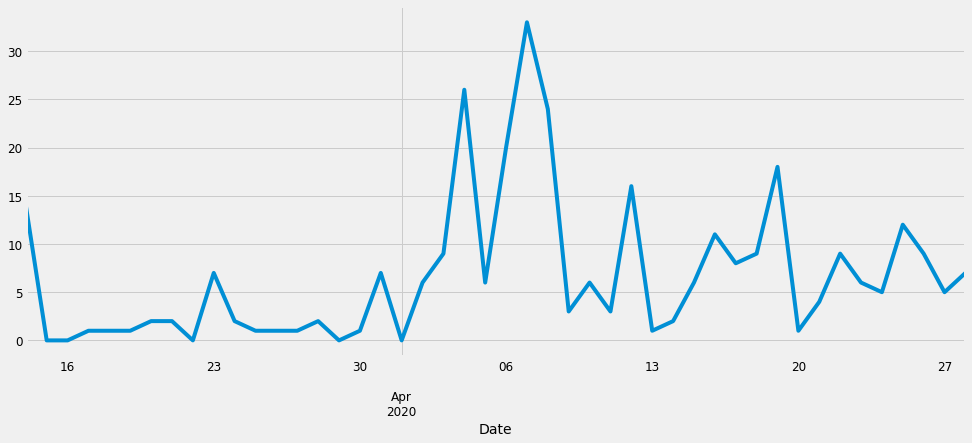

In [5]:
cases.plot(figsize=(15, 6))
plt.show()

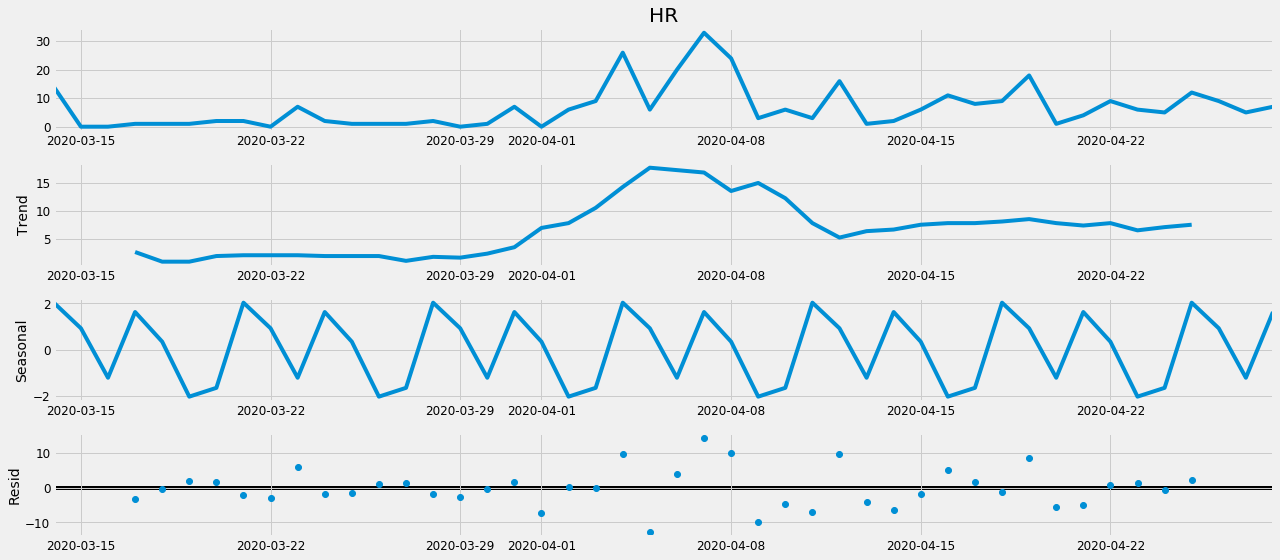

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:336.0688023845214


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1235.3012759770818
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:254.07590803352917
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:147.0766418182288
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:256.4873192317664


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1355.8737277041214
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:164.578149838994
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:151.64192012522477
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:315.5489618810595


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1348.2092187470032
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:241.89692402648853
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:132.6486556647123
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:248.8589837936328


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1355.9111606543415
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:163.59287081431216
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:136.56490438627623
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:308.79791657509384


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1118.9615502959632
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:244.53665097965407
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:146.93863229603966
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:240.5722429073386


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1172.8002124240552
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:157.20908464327565
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:149.76731348647976
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:293.52781438313264
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1039.4324020823692
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:234.10547097664528
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:131.61759157222312
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:235.1788043343186
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1084.9971479915623
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:155.29424775796957
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:136.76956044111793
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:311.04115456386154


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1544.5108108340917
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:245.3013338711688
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:143.71027916106837
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:236.11837804438304


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1552.6313754688183
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:148.66977788200938
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:149.27790225468752
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:300.53861834534695
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1315.8685732387546
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:239.75189274348278
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:131.12330730192244
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:235.85986828775535


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1323.5537425518485
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:143.39933762367343
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:134.09657796121564
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:305.54313310770885


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:746.4587431897116
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:243.57898260496842
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:147.3111609392716
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:232.53215513150442


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:711.3356083661533
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:150.11833776804718
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:150.1901741120543
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:295.0377944205276


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1010.6579763187249
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:235.8670918663913
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:133.51154631352296
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:229.82630993584803
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1056.219454736961
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:150.8195599695101
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:138.7692783528759


In [9]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1208      0.398      0.304      0.761      -0.658       0.900
ma.L1         -0.6050      0.368     -1.646      0.100      -1.326       0.115
ma.S.L12      -1.0000   2.26e+04  -4.42e-05      1.000   -4.43e+04    4.43e+04
sigma2        30.2734   6.84e+05   4.42e-05      1.000   -1.34e+06    1.34e+06


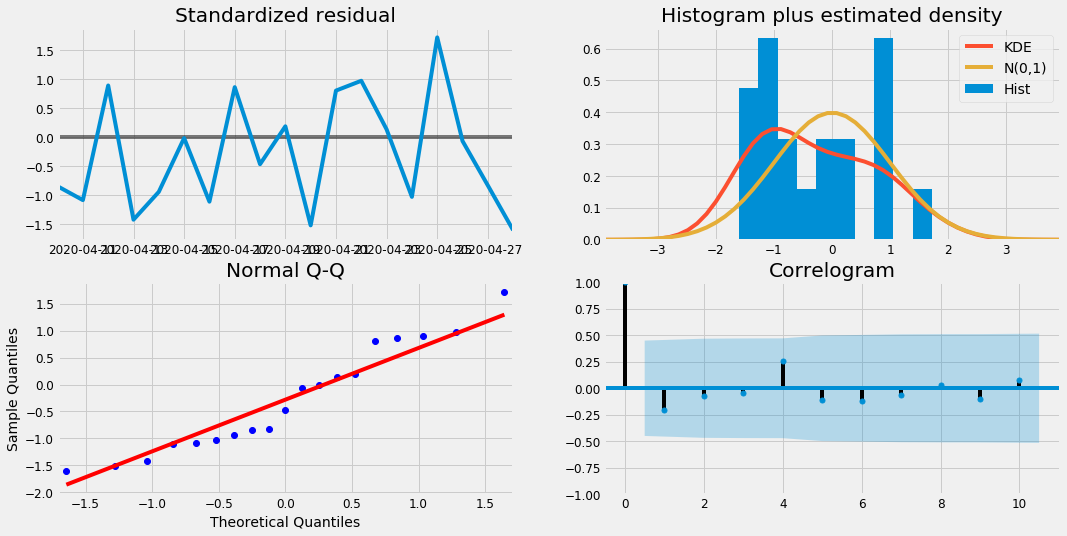

In [10]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

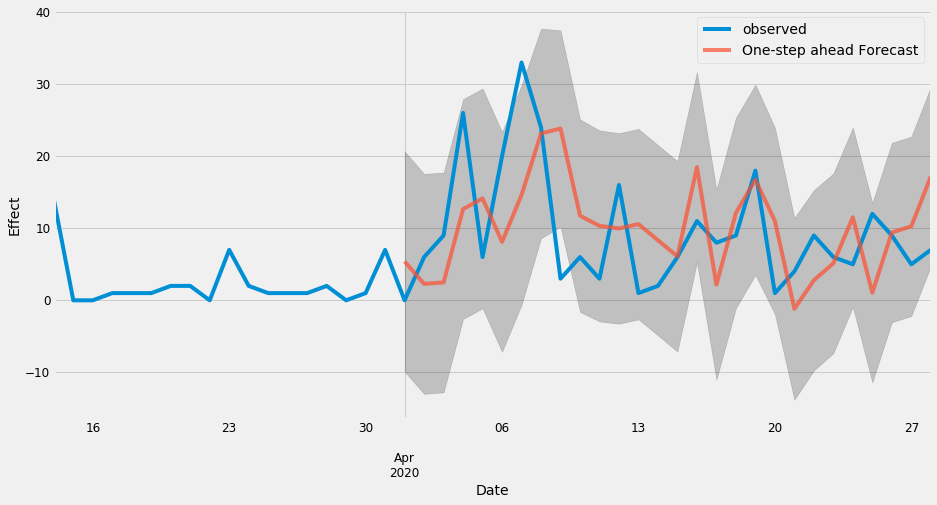

In [11]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [12]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 73.57


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 8.58


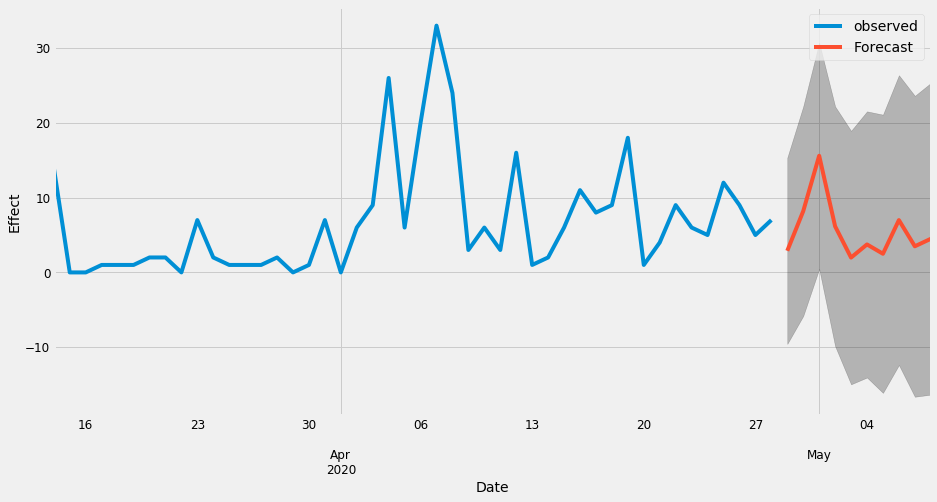

In [14]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [16]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [17]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,5,16
2020-04-25,12,5
2020-04-26,9,8
2020-04-27,5,14
2020-04-28,7,11


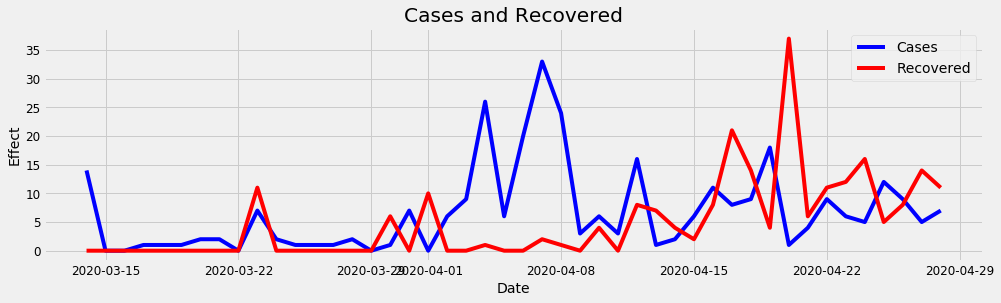

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [19]:
recovered = total_data['Recovered'].resample('D').mean()

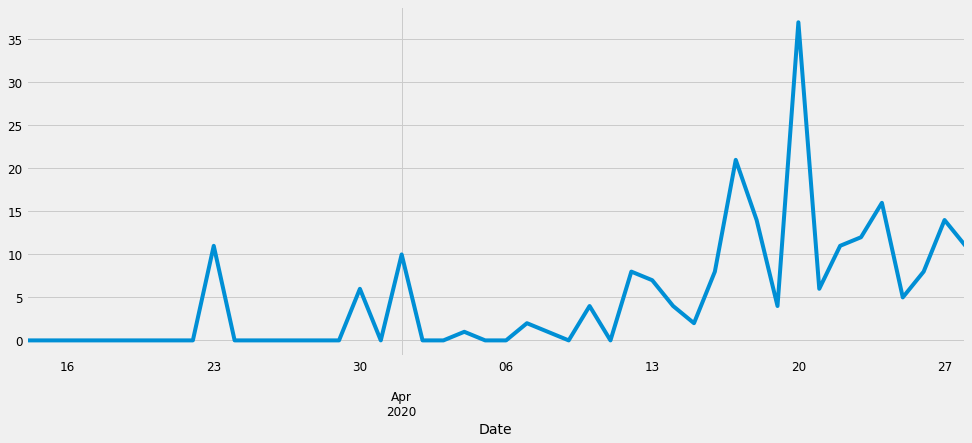

In [20]:
recovered.plot(figsize=(15, 6))
plt.show()

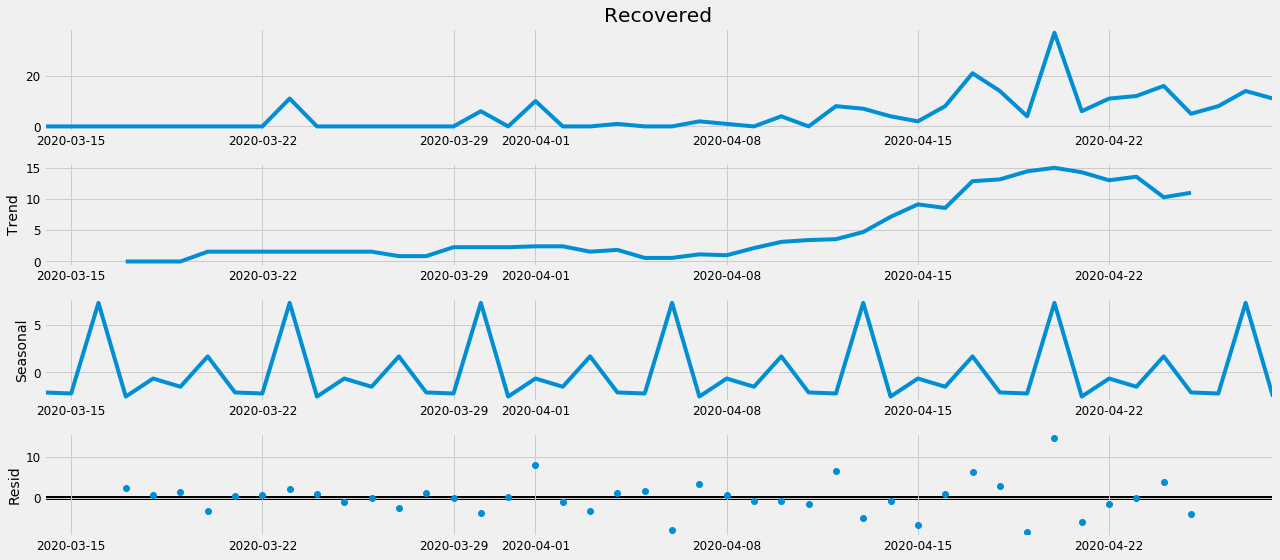

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:325.12373391422017


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1347.3613047697934
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:242.643404217675
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:164.77152140299006
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:250.9163738189236


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1539.947490265186
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:171.43757154462895
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:166.5524241868296
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:313.44901938525175


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1433.215692062796
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:236.0185392057752
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:158.2245379172851
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:249.96652115618554
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5148.726986941357
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:171.45531826207423
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:160.22453781075595
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:316.20489581329406


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:969.5148956943237
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:245.31255069498192
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:162.2529188209228
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:246.57113775682254


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1320.0510229810766
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:169.18646850053935
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:164.24515931981847
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:284.9966755418832


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1262.480307573379
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:222.3110080905676
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:145.16814613417927
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:227.8693932602558


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1275.238198915205
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:158.78024669968056
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:147.4957873389032
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:312.82317571957526
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1425.1128582627364
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:240.6641990218558
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:163.53654335310733
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:240.23996913714168
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1437.2743964701103
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:163.54407765526028
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:165.42628836213896
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:292.7910874420939


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1244.2165040782804
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:230.0908286403638
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:153.4747310678639
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:229.88364637286685


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1256.069010781733
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:160.65810704864373
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:155.47472805517245
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:299.758465344852


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1060.1090202700357
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:233.5522523106162
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:155.31103501544317
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:228.3939070906501


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:986.0892656957479
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:155.95009723116698
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:157.8989502311493
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:284.19050608628095


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1172.6473124580243
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:222.881036325433
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:145.67173705484632
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:221.601897428101


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1196.7593914605113
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:152.8650126145349
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:148.37799499612018


In [23]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3764      0.268     -1.403      0.161      -0.902       0.149
ma.L1         -0.6098      0.268     -2.279      0.023      -1.134      -0.085
ma.S.L12      -1.0003   3996.324     -0.000      1.000   -7833.652    7831.651
sigma2        57.3933   2.29e+05      0.000      1.000    -4.5e+05     4.5e+05


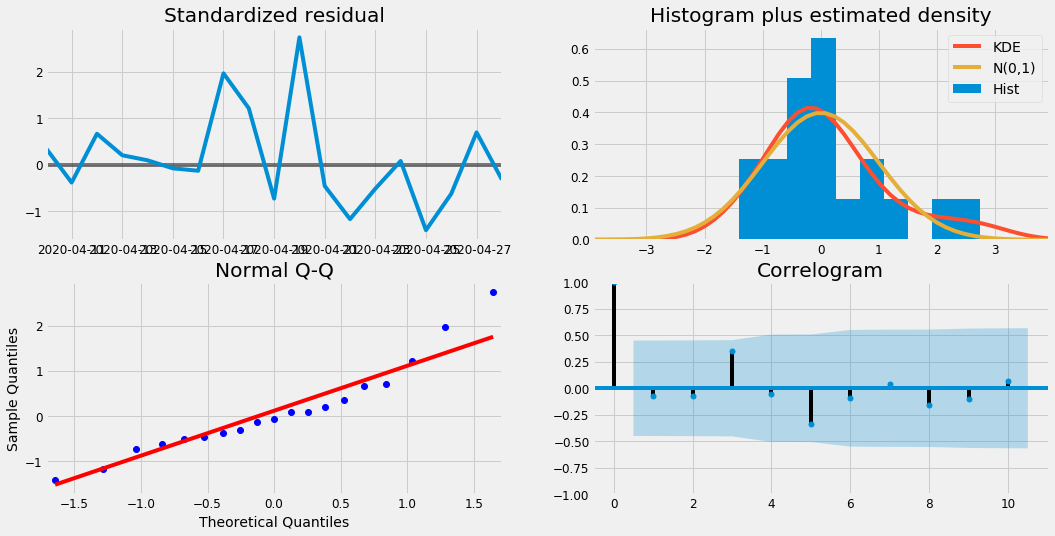

In [24]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

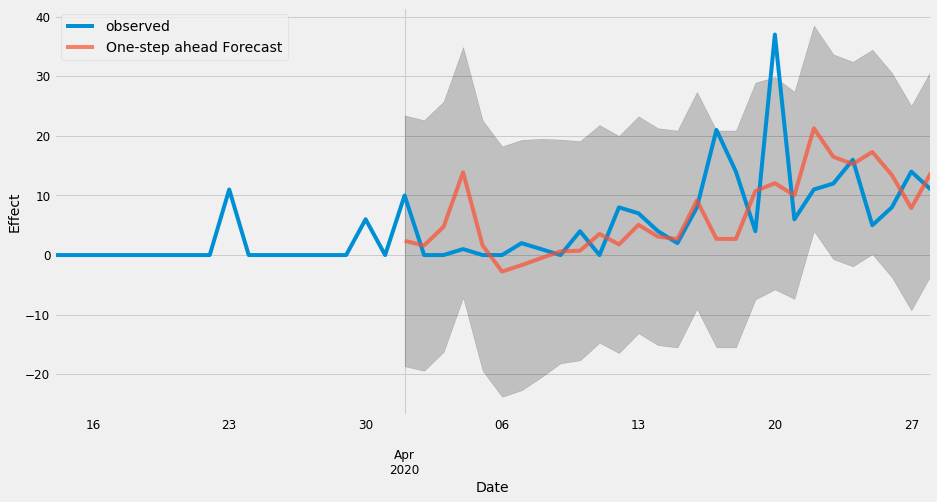

In [25]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [26]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 65.79


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 8.11


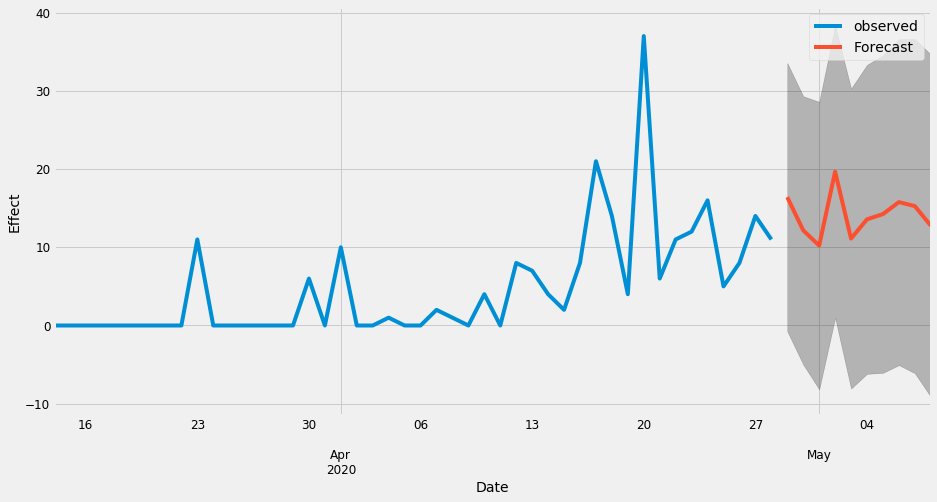

In [28]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

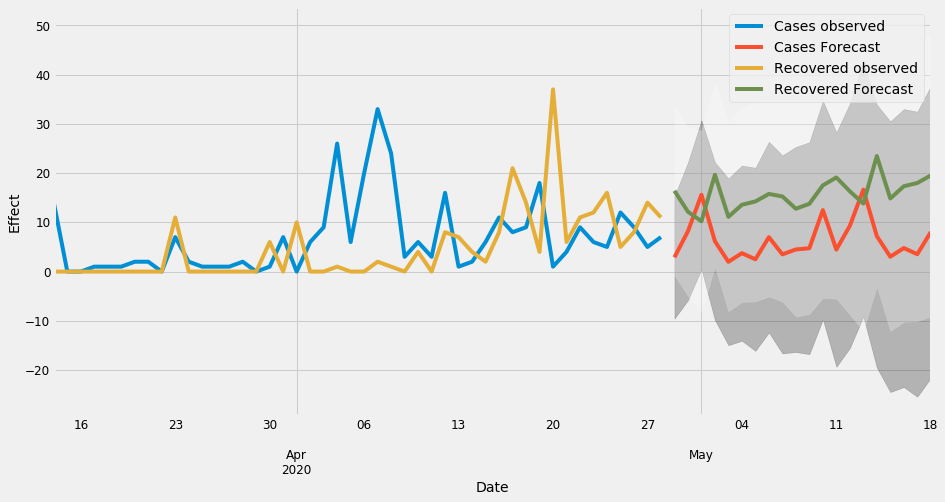

In [29]:
cases_pred_uc = cases_results.get_forecast(steps=20)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=20)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [31]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [32]:
int(np.mean(cases_result_date)[0])

10

In [33]:
int(min(cases_result_date[0]))

1

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-05-03


In [35]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [36]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-04-29


In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-07


In [ ]:
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 9, 6

In [ ]:
sns.distplot(cases_result_date[0])
plt.show(block=True)

In [ ]:
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

In [ ]:
sns.distplot(cases_result_date[0],color='red')
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

In [ ]:
plt.bar([i for i in range(len(total_data['Cases']))], total_data['Cases'], align='center', alpha=0.5, color = 'black')
plt.bar([i for i in range(len(total_data['Recovered']))], total_data['Recovered'][0], align='center', alpha=0.5, color = 'blue')
plt.bar([i for i in range(len(cases_result_date))], cases_result_date[0], align='center', alpha=0.5, color = 'red')
plt.bar([i for i in range(len(recovered_result_date))], recovered_result_date[0], align='center', alpha=0.5, color='green')
plt.show()